<a href="https://colab.research.google.com/github/paruliansaragi/DL-Notebooks/blob/master/TFL3LinLogReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Find a linear relationship between X and Y
to predict Y from X


In [0]:
!wget https://raw.githubusercontent.com/chiphuyen/stanford-tensorflow-tutorials/master/examples/data/birth_life_2010.txt

--2019-01-24 22:04:58--  https://raw.githubusercontent.com/chiphuyen/stanford-tensorflow-tutorials/master/examples/data/birth_life_2010.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5324 (5.2K) [text/plain]
Saving to: ‘birth_life_2010.txt’

birth_life_2010.txt 100%[===================>]   5.20K  --.-KB/s    in 0s      

2019-01-24 22:04:58 (93.9 MB/s) - ‘birth_life_2010.txt’ saved [5324/5324]



First, assume that the relationship between the birth rate and the life expectancy is linear, which means that we can find w and b such that Y = wX + b. 


To find w and b (in this case, they are both scalars), we will use backpropagation through a one layer neural network. For the loss function, we will be using mean squared error. After each epoch, we measure the mean squared difference between the actual value Ys and the predicted values of Ys.


In [0]:
!wget https://raw.githubusercontent.com/chiphuyen/stanford-tensorflow-tutorials/master/examples/utils.py

--2019-01-24 22:05:01--  https://raw.githubusercontent.com/chiphuyen/stanford-tensorflow-tutorials/master/examples/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5167 (5.0K) [text/plain]
Saving to: ‘utils.py’

utils.py            100%[===================>]   5.05K  --.-KB/s    in 0s      

2019-01-24 22:05:01 (78.9 MB/s) - ‘utils.py’ saved [5167/5167]



In [0]:
""" Starter code for simple linear regression example using placeholders
Created by Chip Huyen (huyenn@cs.stanford.edu)
CS20: "TensorFlow for Deep Learning Research"
cs20.stanford.edu
Lecture 03
"""
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import time

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import utils

In [0]:
DATA_FILE = 'birth_life_2010.txt'

# Step 1: read in data from the .txt file
data, n_samples = utils.read_birth_life_data(DATA_FILE)

#***********************
# Step 2: create Dataset and iterator
#https://www.tensorflow.org/api_docs/python/tf/data/Dataset#from_tensor_slices
dataset = tf.data.Dataset.from_tensor_slices((data[:,0], data[:,1]))
#inits tf.data.Dataset which does nothing but pass
#@staticmethod
#from_tensor_slices(tensors) ~ Creates a Dataset whose elements are slices of the given tensors.
#tensors: A nested structure of tensors, each having the same size in the 0th dimension.
#returns a dataset
#with dataset we can now call make initializable iterator()
#Creates an Iterator for enumerating the elements of this dataset.
#Note: The returned iterator will be in an uninitialized state, 
#and you must run the iterator.initializer operation before using it:
iterator = dataset.make_initializable_iterator()
'''
dataset = ...
iterator = dataset.make_initializable_iterator()
# ...
sess.run(iterator.initializer)
'''
#returns An Iterator over the elements of this dataset.
#https://www.tensorflow.org/api_docs/python/tf/data/Iterator#get_next
#Class iterator
#Represents the state of iterating through a Dataset.
'''
__init__(
iterator_resource: A tf.resource scalar tf.Tensor representing the iterator.
initializer: A tf.Operation that should be run to initialize this iterator.
output_types: A nested structure of tf.DType objects corresponding to each component of an element of this iterator.
output_shapes: A nested structure of tf.TensorShape objects corresponding to each component of an element of this iterator.
output_classes: A nested structure of Python type objects corresponding to each component of an element of this iterator.
)
'''
#Creates a new iterator from the given iterator resource.
#get_next()
#Returns a nested structure of tf.Tensors representing the next element.
'''
In graph mode, you should typically call this method once and use its result as the input 
to another computation. A typical loop will then call tf.Session.run on the result of that computation. 
The loop will terminate when the Iterator.get_next() operation raises tf.errors.OutOfRangeError. 
The following skeleton shows how to use this method when building a training loop:
'''
X, Y = iterator.get_next()
'''
dataset = ...  # A <a href="../../tf/data/Dataset"><code>tf.data.Dataset</code></a> object.
iterator = dataset.make_initializable_iterator()
next_element = iterator.get_next()

# Build a TensorFlow graph that does something with each element.
loss = model_function(next_element)
optimizer = ...  # A <a href="../../tf/train/Optimizer"><code>tf.train.Optimizer</code></a> object.
train_op = optimizer.minimize(loss)

with tf.Session() as sess:
  try:
    while True:
      sess.run(train_op)
  except tf.errors.OutOfRangeError:
    pass
'''
#**************************

'\ndataset = ...  # A <a href="../../tf/data/Dataset"><code>tf.data.Dataset</code></a> object.\niterator = dataset.make_initializable_iterator()\nnext_element = iterator.get_next()\n\n# Build a TensorFlow graph that does something with each element.\nloss = model_function(next_element)\noptimizer = ...  # A <a href="../../tf/train/Optimizer"><code>tf.train.Optimizer</code></a> object.\ntrain_op = optimizer.minimize(loss)\n\nwith tf.Session() as sess:\n  try:\n    while True:\n      sess.run(train_op)\n  except tf.errors.OutOfRangeError:\n    pass\n'

In [0]:
#feed dict approach
# Step 2: create placeholders for X (birth rate) and Y (life expectancy)
# Remember both X and Y are scalars with type float
#X = tf.placeholder(tf.float32, name='X')
#Y = tf.placeholder(tf.float32, name='Y')
#############################
########## TO DO ############
#############################

The best way to create a variable is to call the tf.get_variable function. This function requires you to specify the Variable's name. This name will be used by other replicas to access the same variable, as well as to name this variable's value when checkpointing and exporting models. tf.get_variable also allows you to reuse a previously created variable of the same name, making it easy to define models which reuse layers.
https://www.tensorflow.org/guide/variables

In [0]:
#tf.reset_default_graph()

In [0]:
# Step 3: create weight and bias, initialized to 0.0
# Make sure to use tf.get_variable
#To create a variable with tf.get_variable, simply provide the name and shape
#w, b = None, None
w = tf.get_variable('weights', initializer=tf.constant(0.0))
b = tf.get_variable('bias', initializer=tf.constant(0.0))
#############################
########## TO DO ############
#############################

In [0]:
# Step 4: build model to predict Y
# e.g. how would you derive at Y_predicted given X, w, and b
Y_predicted = X * w + b 
#############################
########## TO DO ############
#############################

In [0]:
# Step 5: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name='loss')
#############################
########## TO DO ############
#############################

In [0]:
# Step 6: using gradient descent with learning rate of 0.001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

start = time.time()
# Create a filewriter to write the model's graph to TensorBoard
#############################
########## TO DO ############
#############################

In [0]:
with tf.Session() as sess:
  
	# Step 7: initialize the necessary variables, in this case, w and b
  sess.run(tf.global_variables_initializer()) 
  writer = tf.summary.FileWriter('./graphs/linear_reg', tf.get_default_graph())
	# Step 8: train the model for 100 epochs
  for i in range(100):
    sess.run(iterator.initializer) # initialize the iterator
    total_loss = 0
    for x, y in data:
			# Session execute optimizer and fetch values of loss
      _, l = sess.run([optimizer, loss]) 
      total_loss += l
    print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

	# close the writer when you're done using it
  writer.close() 
	
	# Step 9: output the values of w and b
  w_out, b_out = sess.run([w, b]) 

print('Took: %f seconds' %(time.time() - start))

Epoch 0: 1661.8637834631543
Epoch 1: 956.3224148609137
Epoch 2: 844.6737023980994
Epoch 3: 750.7312486011339
Epoch 4: 667.6598341012079
Epoch 5: 594.1417715627896
Epoch 6: 529.07878103068
Epoch 7: 471.5004191489204
Epoch 8: 420.5458626462441
Epoch 9: 375.45530721966765
Epoch 10: 335.5543025185697
Epoch 11: 300.24629857978107
Epoch 12: 269.00376475843336
Epoch 13: 241.35957466852116
Epoch 14: 216.90039135300015
Epoch 15: 195.25972298129324
Epoch 16: 176.1137693605349
Epoch 17: 159.17551693441837
Epoch 18: 144.1907111125557
Epoch 19: 130.93503488078713
Epoch 20: 119.20935661137888
Epoch 21: 108.8379309807855
Epoch 22: 99.66466760624593
Epoch 23: 91.55177013029001
Epoch 24: 84.37664046781751
Epoch 25: 78.03217824997724
Epoch 26: 72.42182927812989
Epoch 27: 67.46136239485718
Epoch 28: 63.07566952367442
Epoch 29: 59.19874146522856
Epoch 30: 55.77168446383194
Epoch 31: 52.74269822355127
Epoch 32: 50.065632780875376
Epoch 33: 47.70006421631674
Epoch 34: 45.61017902122909
Epoch 35: 43.76379750

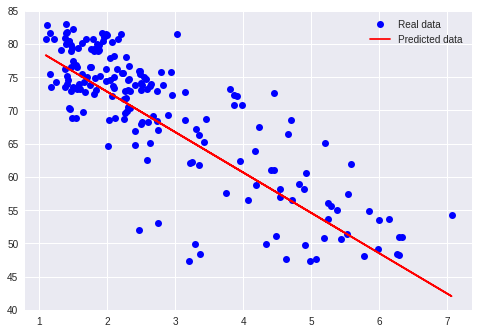

In [0]:
# uncomment the following lines to see the plot 
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w_out + b_out, 'r', label='Predicted data')
plt.legend()
plt.show()

## Control flow: Huber loss 

Looking at the graph, we see that **several outliers on the central bottom are outliers**: they have low birth rate but also low life expectancy. Those **outliers pull the fitted line towards them, making the model perform worse**. One way to **deal with outliers is to use Huber loss.** Intuitively, **squared loss has the disadvantage of giving too much weights to outliers (you square the difference - the larger the difference, the larger its square).** **Huber loss was designed to give less weight to outliers**. Wikipedia has a pretty good article on it. Below is the Huber loss function:
![alt text](https://lh5.googleusercontent.com/neMN1SXQIDTHCesfeYi9UZ_u5yDePwJKbulZ_fdGsU-TYVSgBopd1JftiTheGEtsvj7RoEGbmUgjfRHMSt2o0z3CLtd7F9hRG4JWgljJcE51qw9L55mkRfz9L8OnTT63873I0thpFRI)



Control Flow Ops
tf.count_up_to, tf.cond, tf.case, tf.while_loop, tf.group ...

Comparison Ops
tf.equal, tf.not_equal, tf.less, tf.greater, tf.where, ...

Logical Ops
tf.logical_and, tf.logical_not, tf.logical_or, tf.logical_xor

Debugging Ops
tf.is_finite, tf.is_inf, tf.is_nan, tf.Assert, tf.Print, ...


To implement Huber loss, we can use either tf.greater, tf.less, or tf.cond. We will be using tf.cond since it’s the most general. Other ops’ usage is pretty similar.

tf.cond(
    pred,
    true_fn=None,
    false_fn=None,
    ...)

This basically means that if the condition is true, use the true function. Else, use the false function.


In [0]:
def huber_loss(labels, predictions, delta=14.0):
    residual = tf.abs(labels - predictions)
    def f1(): return 0.5 * tf.square(residual)
    def f2(): return delta * residual - 0.5 * tf.square(delta)
    return tf.cond(residual < delta, f1, f2)


In [0]:
loss = huber_loss(Y, Y_predicted)

In [0]:
with tf.Session() as sess:
  
	# Step 7: initialize the necessary variables, in this case, w and b
  sess.run(tf.global_variables_initializer()) 
  writer = tf.summary.FileWriter('./graphs/linear_reg', tf.get_default_graph())
	# Step 8: train the model for 100 epochs
  for i in range(100):
    sess.run(iterator.initializer) # initialize the iterator
    total_loss = 0
    for x, y in data:
			# Session execute optimizer and fetch values of loss
      _, l = sess.run([optimizer, loss]) 
      total_loss += l
    print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

	# close the writer when you're done using it
  writer.close() 
	
	# Step 9: output the values of w and b
  w_out, b_out = sess.run([w, b]) 

print('Took: %f seconds' %(time.time() - start))

Epoch 0: 405.33390211719086
Epoch 1: 276.92073493803804
Epoch 2: 255.1913424629914
Epoch 3: 236.14337305095242
Epoch 4: 218.3417923638107
Epoch 5: 201.69615517933119
Epoch 6: 186.1379784750311
Epoch 7: 171.61408097820456
Epoch 8: 158.0709525794183
Epoch 9: 145.4507711169653
Epoch 10: 133.70481315503682
Epoch 11: 122.79710759645405
Epoch 12: 112.70195787006784
Epoch 13: 103.37940461973807
Epoch 14: 94.7801957005929
Epoch 15: 86.86284926594729
Epoch 16: 79.58955065573774
Epoch 17: 72.94197483201953
Epoch 18: 66.88776330485156
Epoch 19: 61.392573215283065
Epoch 20: 56.41485941145373
Epoch 21: 51.923847821036254
Epoch 22: 47.88031687229186
Epoch 23: 44.248855766663816
Epoch 24: 40.990793884389326
Epoch 25: 38.06812910462215
Epoch 26: 35.44948532420064
Epoch 27: 33.1085885187562
Epoch 28: 31.019667888507644
Epoch 29: 29.159701655594336
Epoch 30: 27.506428265787267
Epoch 31: 26.0378558288552
Epoch 32: 24.734017096518073
Epoch 33: 23.576581879115913
Epoch 34: 22.54903337754505
Epoch 35: 21.63

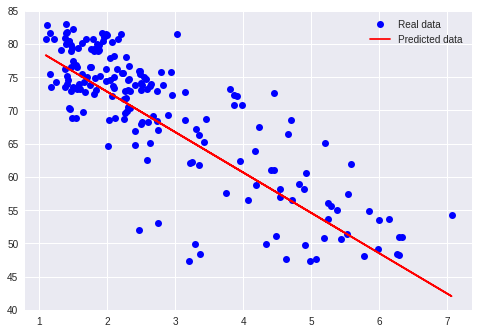

In [0]:
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w_out + b_out, 'r', label='Predicted data')
plt.legend()
plt.show()

## tf.data

According to Derek Murray in his introduction to tf.data, a nice thing about placeholder and feed_dicts is that they put the data processing outside TensorFlow, making it easy to shuffle, batch, and generate arbitrary data in Python. The drawback is that this mechanism can potentially slow down your program. Users often end up **processing their data in a single thread and creating data bottleneck** that slows execution down.

TensorFlow also offers queues as another option to handle your data. This provides performance as it lets you do pipelining, threading and reduces the time loading data into placeholders. However, queues are notorious for being difficult to use and prone to crashing.

Recently, demand for a better way to handle your data has been all the rage, and TensorFlow answers with tf.data module. It promises to be faster than placeholders and easier to use than queues, and doesn’t crash. So how does this magical thing work?

Notice that in our linear regression, we stored the input data in a numpy array called data, each row of this numpy array is a pair value for (x, y), corresponding to a data point. To import this data into our TensorFlow model, we created placeholders for x (feature) and y (label). We then iterate through each data point with a for loop in step 8 and feed it into the placeholders with a feed_dict. We can, of course, use batches of data points instead of individual data points, but the key here is that the process of feeding the data from this numpy array to the TensorFlow model is slow and can get in the way of other execution of other ops.

Step 1: read in data from the .txt file
data is a numpy array of shape (190, 2), each row is a datapoint
data, n_samples = utils.read_birth_life_data(DATA_FILE)

Step 2: create placeholders for X (birth rate) and Y (life expectancy)
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

...
`with tf.Session() as sess:`
       ...
	
	# Step 8: train the model
	for i in range(100): # run 100 epochs
		for x, y in data:
			# Session runs train_op to minimize loss
			sess.run(optimizer, feed_dict={X: x, Y:y}) 
      
With tf.data, instead of storing our input data in a non-TensorFlow object, we store it in a tf.data.Dataset object. We can create a Dataset from tensors with:

`tf.data.Dataset.from_tensor_slices((features, labels))`

features and labels are supposed to be tensors, but remember that since TensorFlow and Numpy are seamlessly integrated, they can be NumPy arrays. We can initialize our dataset as followed:

`dataset = tf.data.Dataset.from_tensor_slices((data[:,0], data[:,1]))`


You can also create a tf.data.Dataset from files using one of TensorFlow’s file format parsers, all of them have striking similarity to the old DataReader.
tf.data.**TextLineDataset(filenames)**: each of the line in those files will become one entry. **It’s good for datasets whose entries are delimited by newlines such as data used for machine translation or data in csv files.**

tf.data.**FixedLengthRecordDataset(filenames)**: each of the data point in this dataset is of the same length. It’s good for datasets whose entries are of a fixed length, such as CIFAR or ImageNet.

tf.data.TFRecordDataset(filenames): it’s good to use if your data is stored in tfrecord format.

Example:
dataset = tf.data.FixedLengthRecordDataset([file1, file2, file3, ...])

After we have **turned our data into a magical Dataset object**, we can **iterate through samples in this Dataset using an iterator**. An iterator **iterates through the Dataset and returns a new sample or batch each time we call get_next().** Let’s start with make_one_shot_iterator(), we’ll find out what it is in a bit. The iterator is of the class tf.data.Iterator.


In [0]:
iterator = dataset.make_one_shot_iterator()
X, Y = iterator.get_next()         # X is the birth rate, Y is the life expectancy

In [0]:
#Each time we execute ops X, Y, we get a new data point.
with tf.Session() as sess:
	print(sess.run([X, Y]))		# >> [1.822, 74.82825]
	print(sess.run([X, Y]))		# >> [3.869, 70.81949]
	print(sess.run([X, Y]))		# >> [3.911, 72.15066]


In [0]:
#Now we can just compute Y_predicted and losses from X and Y just like you did with placeholders. The difference is that when you execute your graph, you no longer need to supplement data through feed_dict.
for i in range(100): # train the model 100 epochs
        total_loss = 0
        try:
            while True:
                sess.run([optimizer]) 
        except tf.errors.OutOfRangeError:
            pass


We have to catch the OutOfRangeError because miraculously, TensorFlow doesn’t automatically catch it for us. If we run this code, we will see that we only get non zero loss in the first epoch. After that, the loss is always 0. It’s because dataset.make_one_shot_iterator() literally gives you only one shot. It’s fast to use -- you don’t have to initialize it -- but it can be used only once. After one epoch, you reach the end of your data and you can’t re-initialize it for the next epoch.

To use for multiple epochs, we use `dataset.make_initializable_iterator()`. At the beginning of each epoch, you have to re-initialize your iterator.



In [0]:
iterator = dataset.make_initializable_iterator()
...
for i in range(100): 
        sess.run(iterator.initializer) 
        total_loss = 0
        try:
            while True:
                sess.run([optimizer]) 
        except tf.errors.OutOfRangeError:
            pass

With tf.data.Dataset, you can batch, shuffle, repeat your data with just one command. You can also map each element of your dataset to transform it in a specific way to create a new dataset.


In [0]:
dataset = dataset.shuffle(1000)
dataset = dataset.repeat(100)
dataset = dataset.batch(128)
dataset = dataset.map(lambda x: tf.one_hot(x, 10)) 
# convert each element of dataset to one_hot vector

## Does tf.data really perform better?
To compare the performance of tf.data with that of placeholders, I ran each model 100 times and calculated the average time each model took. On my Macbook Pro with 2.7 GHz Intel Core i5, the model with placeholder took on average 9.05271519 seconds, while the model with tf.data took on average 6.12285947 seconds. tf.data **improves the performance by 32.4%** compared to placeholders!

So yes, tf.data does deliver. It makes importing and processing data easier while making our program run faster. 
## Optimizers
In the code above, there are two lines that haven’t been explained.

`optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)
sess.run([optimizer]) `

I remember the first time I ran into code similar to these, I was very confused.

Why is optimizer in the fetches list of tf.Session.run()?

How does TensorFlow know what variables to update?

optimizer is an op whose job is to minimize loss. To execute this op, we need to pass it into the list of fetches of tf.Session.run(). When TensorFlow executes optimizer, it will execute the part of the graph that this op depends on. In this case, we see that optimizer depends on loss, and loss depends on inputs X,  Y, as well as two variables weights and bias. 


From the graph, you can see that the giant node GradientDescentOptimizer depends on 3 nodes: weights, bias, and gradients (which are automatically taken care of for us).

**GradientDescentOptimizer means that our update rule is gradient descent. TensorFlow does auto differentiation for us, then update the values of w and b to minimize the loss. Autodiff is amazing!**

By default, the optimizer **trains all the trainable variables its objective function depends on**. If there are variables that you do not want to train, you can set the keyword trainable=False when you declare a variable. One example of a variable you don’t want to train is the variable **global_step, a common variable you will see in many TensorFlow model to keep track of how many times you’ve run your model.**




In [0]:
global_step = tf.Variable(0, trainable=False, dtype=tf.int32)
learning_rate = 0.01 * 0.99 ** tf.cast(global_step, tf.float32)
increment_step = global_step.assign_add(1)#??assign_add()
optimizer = tf.train.GradientDescentOptimizer(learning_rate) # learning rate can be a tensor

In [0]:
tf.Variable(
    initial_value=None,
    trainable=True,
    collections=None,
    validate_shape=True,
    caching_device=None,
    name=None,
    variable_def=None,
    dtype=None,
    expected_shape=None,
    import_scope=None,
    constraint=None
)

tf.get_variable(
    name,
    shape=None,
    dtype=None,
    initializer=None,
    regularizer=None,
    trainable=True,
    collections=None,
    caching_device=None,
    partitioner=None,
    validate_shape=True,
    use_resource=None,
    custom_getter=None,
    constraint=None
)

You can also ask your optimizer to take gradients of specific variables. You can also modify the gradients calculated by your optimizer.

In [0]:
# create an optimizer.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)

# compute the gradients for a list of variables.
grads_and_vars = optimizer.compute_gradients(loss, <list of variables>)

# grads_and_vars is a list of tuples (gradient, variable).  Do whatever you
# need to the 'gradient' part, for example, subtract each of them by 1.
subtracted_grads_and_vars = [(gv[0] - 1.0, gv[1]) for gv in grads_and_vars]

# ask the optimizer to apply the subtracted gradients.
optimizer.apply_gradients(subtracted_grads_and_vars)

You can also **prevent certain tensors from contributing to the calculation of  the derivatives with respect to a specific loss with tf.stop_gradient.** 


In [0]:
stop_gradient( input, name=None )

This is very useful in situations when you want to freeze certain variables during training. Here are some examples given by TensorFlow’s official documentation.
**When you train a GAN (Generative Adversarial Network) where no backprop should happen through the adversarial example generation process.**
The EM algorithm where the M-step should not involve backpropagation through the output of the E-step.

The optimizer classes automatically compute derivatives on your graph, but you can explicitly ask TensorFlow to calculate certain gradients with tf.gradients.


In [0]:
tf.gradients(
    ys,
    xs,
    grad_ys=None,
    name='gradients',
    colocate_gradients_with_ops=False,
    gate_gradients=False,
    aggregation_method=None,
    stop_gradients=None
)

*This method constructs symbolic partial derivatives of sum of ys w.r.t. x in xs. ys and xs are each a Tensor or a list of tensors. grad_ys is a list of Tensor, holding the gradients received by the ys. The list must be the same length as ys.*

Technical detail: This is especially useful when training only parts of a model. For example, we can use tf.gradients()  to take the derivative G of the loss w.r.t. to the middle layer. Then we use an optimizer to minimize the difference between the middle layer output M and M + G. This only updates the lower half of the network.


List of optimizers

GradientDescentOptimizer is not the only update rule that TensorFlow supports. Here is the list of optimizers that TensorFlow supports, as of 1/17/2017. The names are self-explanatory. You can visit the official documentation for more details:

tf.train.Optimizer

tf.train.GradientDescentOptimizer

tf.train.AdadeltaOptimizer

tf.train.AdagradOptimizer

tf.train.AdagradDAOptimizer

tf.train.MomentumOptimizer

tf.train.AdamOptimizer

tf.train.FtrlOptimizer

tf.train.ProximalGradientDescentOptimizer

tf.train.ProximalAdagradOptimizer

tf.train.RMSPropOptimizer

**Sebastian Ruder, a PhD candidate at the Insight Research Centre for Data Analytics did a pretty great comparison of these optimizers in his blog post**. If you’re too lazy to read, here is the conclusion:

“RMSprop is an extension of Adagrad that deals with its radically diminishing learning rates. It is identical to Adadelta, except that Adadelta uses the RMS of parameter updates in the numerator update rule. Adam, finally, adds bias-correction and momentum to RMSprop. Insofar, RMSprop, Adadelta, and Adam are very similar algorithms that do well in similar circumstances. Kingma et al. [15] show that its bias-correction helps Adam slightly outperform RMSprop towards the end of optimization as gradients become sparser. Insofar, Adam might be the best overall choice.”

**TL;DR:** Use AdamOptimizer.
Discussion questions
What are some of the real world problems that we can solve using linear regression? Can you write a quick program to do so?

# Logistic Regression with MNIST
Let’s build a  logistic regression model in TensorFlow solving the good old classifier on the MNIST database.

The MNIST (Mixed National Institute of Standards and Technology database) is one of the most popular databases used for training various image processing systems. It is a database of handwritten digits. The images look like this:


Each image is 28 x 28 pixels. You can flatten each image to be a 1-d tensor of size 784. Each comes with a label from 0 to 9. For example, images on the first row is labelled as 0, the second as 1, and so on. The dataset is hosted on Yann Lecun’s website. 

TF Learn (the simplified interface of TensorFlow) has a script that lets you load the MNIST dataset from Yann Lecun’s website and divide it into train set, validation set, and test set.


In [0]:

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('data/mnist', one_hot=True) 

One-hot encoding
In digital circuits, one-hot refers to a group of bits among which the legal combinations of values are only those with a single high (1) bit and all the others low (0).

In this case, one-hot encoding means that if the output of the image is the digit 7, then the output will be encoded as a vector of 10 elements with all elements being 0, except for the element at index 7 which is 1.


input_data.read_data_sets('data/mnist', one_hot=True) returns an instance of learn.datasets.base.Datasets, which contains three generators to 55,000 data points of training data (mnist.train), 10,000 points of test data (mnist.test), and 5,000 points of validation data (mnist.validation). You get the samples of these datasets by calling next_batch(batch_size), for example, mnist.train.next_batch(batch_size) with a batch_size of your choice. However, in real life, we often don’t have access to an off the shelf data parser I thought it’d be nice for us to just read in the MNIST data ourselves. It’s also a good practice because in your real life work, you’re likely to have to write your own data parser.

I’ve already written the code for downloading and parsing MNIST data into numpy arrays in the file utils.py. All you need to do in your program is: 



In [0]:

mnist_folder = 'data/mnist'
utils.download_mnist(mnist_folder)
train, val, test = utils.read_mnist(mnist_folder, flatten=True)


We choose flatten=True because we want each image to be flattened into a 1-d tensor. Each of train, val, and test in this case is a tuple of NumPy arrays, the first is a NumPy array of images, the second of labels. We need to create two Dataset objects, one for train set and one for test set (in this example, we won’t be using val set). 


In [0]:

train_data = tf.data.Dataset.from_tensor_slices(train)
# train_data = train_data.shuffle(10000) # if you want to shuffle your data
test_data = tf.data.Dataset.from_tensor_slices(test)


The construction of the logistic regression model is pretty similar to the linear regression model. However, now we have A LOT more data. If we calculate gradient after every single data point it’d be painfully slow. Fortunately, we can process the data in batches. 


In [0]:

train_data = train_data.batch(batch_size)
test_data = test_data.batch(batch_size)


The next step is to create an iterator to get samples from the two datasets. In the linear regression example, we used only the train set, so it was okay to create an iterator for that dataset and just draw samples from that dataset. When we have more than one dataset, if we have one iterator for each dataset, we would need to build one graph for each iterator! A better way to do it is to create one single iterator and initialize it with a dataset when we need to draw data from that dataset.


In [0]:

iterator = tf.data.Iterator.from_structure(train_data.output_types, 
                                           train_data.output_shapes)
img, label = iterator.get_next()

train_init = iterator.make_initializer(train_data)	# initializer for train_data
test_init  = iterator.make_initializer(test_data)	# initializer for test_data

with tf.Session() as sess:
    ...
    for i in range(n_epochs):       # train the model n_epochs times
        sess.run(train_init)	       # drawing samples from train_data
        try:
            while True:
                _, l = sess.run([optimizer, loss])
        except tf.errors.OutOfRangeError:
            pass

    # test the model
    sess.run(test_init)		# drawing samples from test_data
    try:
        while True:
            sess.run(accuracy)
    except tf.errors.OutOfRangeError:
        pass




Similar to linear regression, you can download the starter file examples/03_logreg_starter.py from the class’s GitHub repo and give it a shot. You can see the solution at examples/03_logreg.py.

Running on my Mac, the batch version of the model with batch size 128 runs in 1 second, while the non-batch model runs in 30 seconds! Note that larger batch size typically requires more epochs since it does fewer update steps. See “mini-batch size” in Bengio's practical tips. Larger batch size also requires more memory.

We achieved the accuracy of 91.34% after 30 epochs. This is about as good as we can get from a linear classifier.

Shuffling can affect performance: without shuffling, the accuracy is consistently at 91.34%. With shuffle, the accuracy fluctuates between 88% to 93%.
